In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import datetime

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

--2023-01-09 02:08:42--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2023-01-09 02:08:42--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2023-01-09 02:08:43--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7

In [ ]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])
target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])

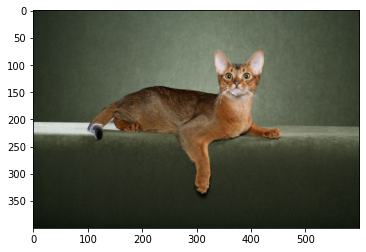

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
plt.imshow(load_img(input_img_paths[0]));

In [ ]:
target = []

for breed in target_paths:
  target.append(breed.split('/',2)[2].rsplit('_',1)[0])

In [ ]:
list_breeds  = np.unique(target)

cats_vs_dogs = [0 if i[0].isupper() == True else 1 for i in target]

labelEncDict = {name : ind for ind, name in enumerate(list_breeds)}
for k, v in labelEncDict.items():
    print(f"{k:32} : {v}")

Abyssinian                       : 0
Bengal                           : 1
Birman                           : 2
Bombay                           : 3
British_Shorthair                : 4
Egyptian_Mau                     : 5
Maine_Coon                       : 6
Persian                          : 7
Ragdoll                          : 8
Russian_Blue                     : 9
Siamese                          : 10
Sphynx                           : 11
american_bulldog                 : 12
american_pit_bull_terrier        : 13
basset_hound                     : 14
beagle                           : 15
boxer                            : 16
chihuahua                        : 17
english_cocker_spaniel           : 18
english_setter                   : 19
german_shorthaired               : 20
great_pyrenees                   : 21
havanese                         : 22
japanese_chin                    : 23
keeshond                         : 24
leonberger                       : 25
miniature_pinscher    

In [ ]:
labelDecDict = {ind: name for name, ind in labelEncDict.items()}
for k, v in labelDecDict.items():
    print(f"{k:3} : {v}")

  0 : Abyssinian
  1 : Bengal
  2 : Birman
  3 : Bombay
  4 : British_Shorthair
  5 : Egyptian_Mau
  6 : Maine_Coon
  7 : Persian
  8 : Ragdoll
  9 : Russian_Blue
 10 : Siamese
 11 : Sphynx
 12 : american_bulldog
 13 : american_pit_bull_terrier
 14 : basset_hound
 15 : beagle
 16 : boxer
 17 : chihuahua
 18 : english_cocker_spaniel
 19 : english_setter
 20 : german_shorthaired
 21 : great_pyrenees
 22 : havanese
 23 : japanese_chin
 24 : keeshond
 25 : leonberger
 26 : miniature_pinscher
 27 : newfoundland
 28 : pomeranian
 29 : pug
 30 : saint_bernard
 31 : samoyed
 32 : scottish_terrier
 33 : shiba_inu
 34 : staffordshire_bull_terrier
 35 : wheaten_terrier
 36 : yorkshire_terrier


In [ ]:
for i in labelEncDict.keys():
    print(f"{i:32} : {target.count(i)}")

Abyssinian                       : 200
Bengal                           : 200
Birman                           : 200
Bombay                           : 200
British_Shorthair                : 200
Egyptian_Mau                     : 200
Maine_Coon                       : 200
Persian                          : 200
Ragdoll                          : 200
Russian_Blue                     : 200
Siamese                          : 200
Sphynx                           : 200
american_bulldog                 : 200
american_pit_bull_terrier        : 200
basset_hound                     : 200
beagle                           : 200
boxer                            : 200
chihuahua                        : 200
english_cocker_spaniel           : 200
english_setter                   : 200
german_shorthaired               : 200
great_pyrenees                   : 200
havanese                         : 200
japanese_chin                    : 200
keeshond                         : 200
leonberger               

In [ ]:
import numpy as np
import random

img_size = (224, 224)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target)
random.Random(1337).shuffle(cats_vs_dogs)

def path_to_input_image(path):
    img = load_img(path)
    img = tf.image.resize_with_pad(img_to_array(img, dtype = 'float32'), *img_size).numpy().astype('uint8')
    return img

input_imgs = []
targets = np.array(target)
for i in range(num_imgs):
    input_imgs.append(path_to_input_image(input_img_paths[i]))
input_imgs = np.array(input_imgs)

In [ ]:
input_imgs.shape, targets.shape

((7390, 224, 224, 3), (7390,))

In [ ]:
labelsEncoded = list(map(lambda x : labelEncDict.get(x), target))

for i, l in zip(input_img_paths[::1000], labelsEncoded[::1000]):
    print(f"{i:32}\t{labelDecDict[l]:32}\t{l}")

images/British_Shorthair_47.jpg 	British_Shorthair               	4
images/Russian_Blue_240.jpg     	Russian_Blue                    	9
images/english_setter_60.jpg    	english_setter                  	19
images/havanese_101.jpg         	havanese                        	22
images/Sphynx_186.jpg           	Sphynx                          	11
images/great_pyrenees_42.jpg    	great_pyrenees                  	21
images/german_shorthaired_72.jpg	german_shorthaired              	20
images/Maine_Coon_187.jpg       	Maine_Coon                      	6


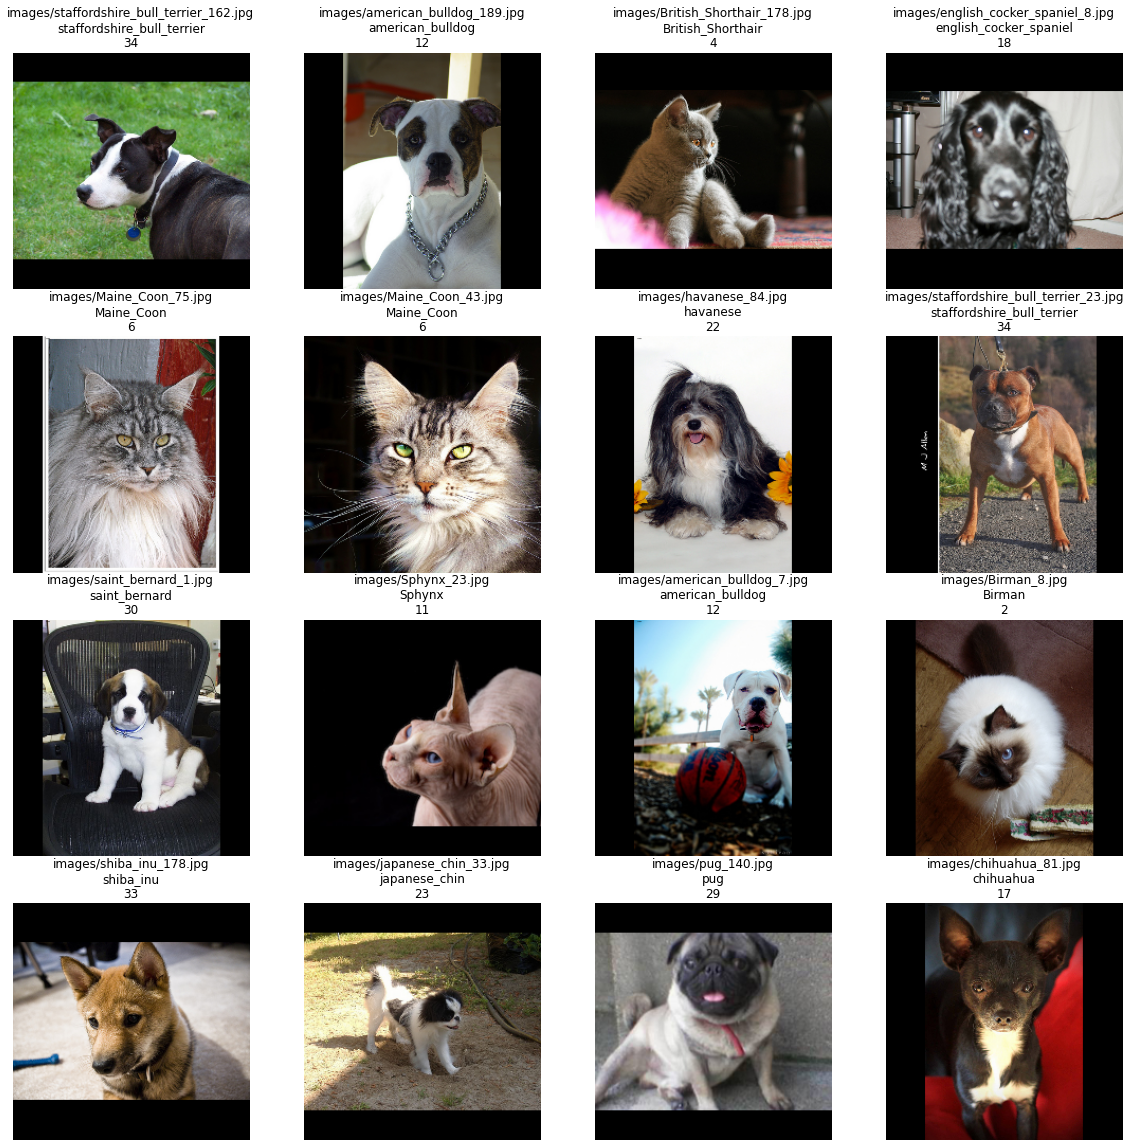

In [ ]:
plt.subplots(nrows = 4, ncols = 4, figsize = (20, 20))

for i, imgIndex in enumerate(np.random.randint(0, len(input_img_paths), size = 16)):
    plt.subplot(4, 4, i + 1)
    plt.axis(False)
    plt.grid(False)
    plt.title(f'{input_img_paths[imgIndex]}\n{targets[imgIndex]}\n{labelsEncoded[imgIndex]}')
    plt.imshow(input_imgs[imgIndex])
plt.show()

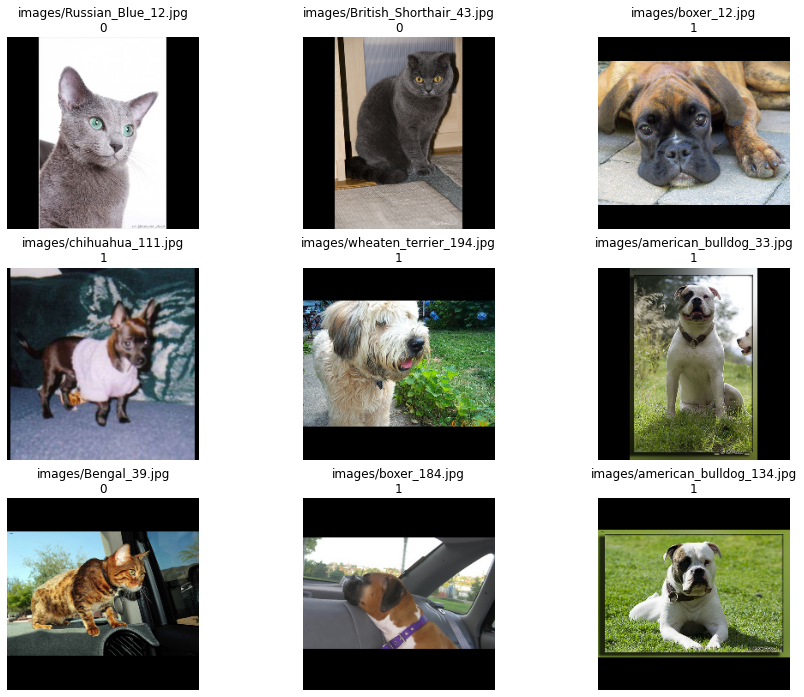

In [ ]:
plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))

for i, imgIndex in enumerate(np.random.randint(0, len(input_img_paths), size = 9)):
    plt.subplot(3, 3, i + 1)
    plt.axis(False)
    plt.grid(False)
    plt.title(f'{input_img_paths[imgIndex]}\n{cats_vs_dogs[imgIndex]}')
    plt.imshow(input_imgs[imgIndex])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

IMAGE_SIZE = (224, 224)
RANDOM_STATE = 42
TRAIN_SIZE, VAL_SIZE, TEST_SIZE = 0.8, 0.1, 0.1

X_tv, X_test, y_tv, y_test = train_test_split(
    input_imgs,
    labelsEncoded,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = targets
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_tv,
    y_tv,
    test_size = VAL_SIZE,
    random_state = RANDOM_STATE,
    stratify = y_tv
    )

print(f'Training Data: {X_train.shape}')
print(f'Training Labels: {len(y_train)}')
print(f'\nValidation Data: {X_val.shape}')
print(f'Validation Labels: {len(y_val)}')
print(f'\nTesting Data: {X_test.shape}')
print(f'Testing Labels: {len(y_test)}')

Training Data: (5985, 224, 224, 3)
Training Labels: 5985

Validation Data: (666, 224, 224, 3)
Validation Labels: 666

Testing Data: (739, 224, 224, 3)
Testing Labels: 739


In [ ]:
train_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range = 30,
                               width_shift_range = 0.1,
                               #height_shift_range = 0.1,
                               #shear_range = 0.1,
                               #zoom_range = 0.1,
                               #horizontal_flip = True,
                               fill_mode = 'nearest',
                               #preprocessing_function=to_grayscale_then_rgb)
                               )
train_data = train_gen.flow(x = X_train, y = y_train, batch_size = 32, shuffle = True)
len(train_data)

188

In [ ]:
val_gen = ImageDataGenerator(rescale = 1./255,
                             )
val_data = val_gen.flow(x = X_val, y = y_val, batch_size = 32, shuffle = True)
len(val_data)

21

In [ ]:
test_gen = ImageDataGenerator(rescale = 1./255,
                             )

test_data = test_gen.flow(x = X_test, y = y_test, batch_size = 32, shuffle=False) # False because it must stay in the same order as the y_test, we will need it in the classification report
len(test_data)

24

In [ ]:
del input_imgs
del labelsEncoded
del X_tv
del y_tv

In [ ]:
def plot_generator_images(gen, suptitle, labelDecDict, print_pred = False, model = None, nrows = 3, ncols = 3, figsize = (12, 12)):
    gen_data = gen.next()

    plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
    #plt.suptitle(suptitle, fontsize = 20)
    plt.tight_layout(rect = [0, 0, 1, 0.96], h_pad = 2)

    if(print_pred and model):
        pred = np.argmax(model.predict(gen_data[0]), axis=1)

    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.axis(False)
        plt.grid(False)

        if(print_pred and pred.any()):
            plt.title(f"True: {labelDecDict[gen_data[1][i]]}\nPredicted: {labelDecDict[pred[i]]}")
        else:
            plt.title(f'Label: {gen_data[1][i]}\nBreed: {labelDecDict[gen_data[1][i]]}')
        plt.imshow(gen_data[0][i])

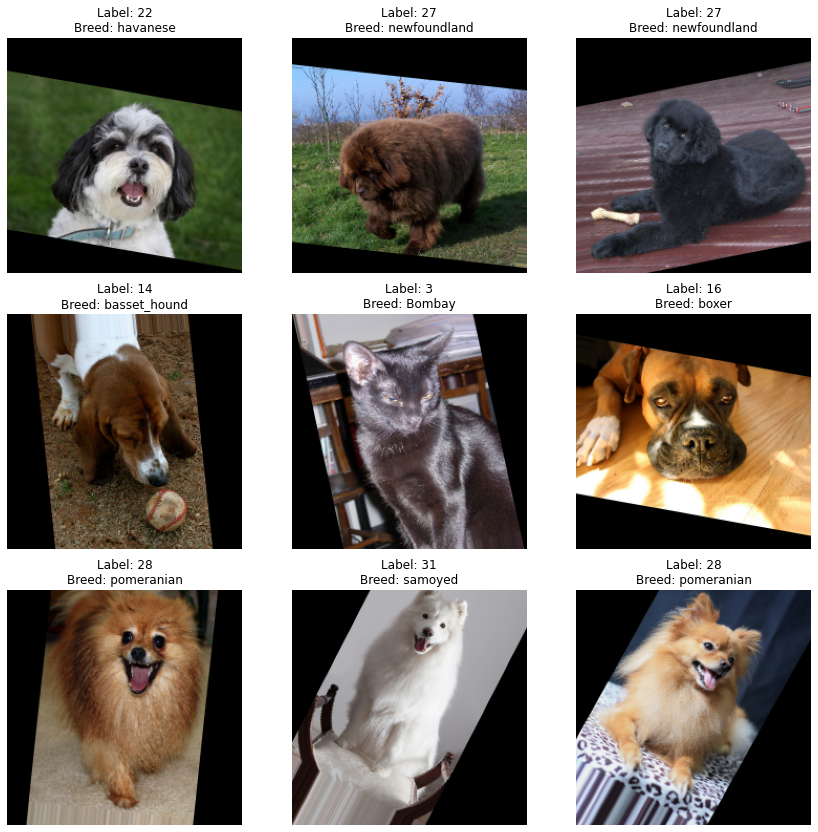

In [ ]:
plot_generator_images(train_data, "Training data", labelDecDict)

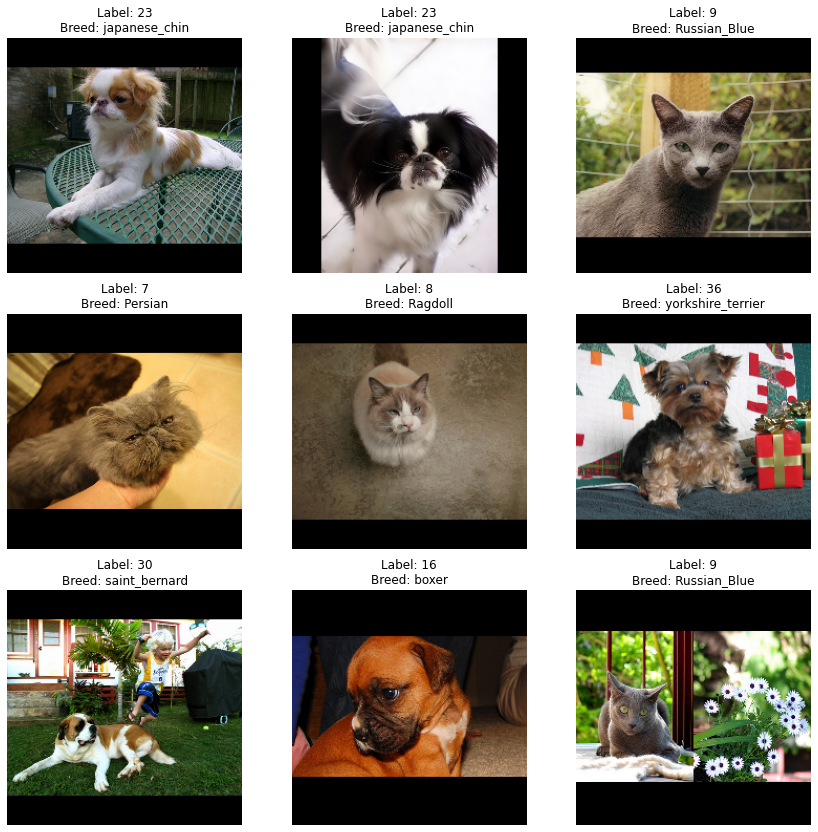

In [ ]:
plot_generator_images(val_data, "Training data", labelDecDict)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow import keras

In [ ]:
# Using a pre-trained TF2 SavedModel from TensorFlow Hub
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
resnset50 = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
efficientnetv2_s = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2'

classifier_model = {'mobilenet_v2':mobilenet_v2, 'efficientnetv2_s' : efficientnetv2_s,'resnset50':resnset50}

In [ ]:
import tensorflow_hub as hub

#%%time
histories = {}
for name in classifier_model:
    pretrained_base = hub.KerasLayer(classifier_model[name], trainable = False)
    model = keras.Sequential([
        pretrained_base,
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(37, activation='softmax'),
    ])
    model.compile(
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    history = model.fit(
        train_data,
        validation_data= val_data,
        epochs=3,
    )
    histories[name] = history

Epoch 1/3
188/188 [==============================] - 276s 1s/step - loss: 1.9081 - accuracy: 0.4685 - val_loss: 0.5855 - val_accuracy: 0.8318
Epoch 2/3
188/188 [==============================] - 262s 1s/step - loss: 0.8661 - accuracy: 0.7317 - val_loss: 0.4744 - val_accuracy: 0.8468
Epoch 3/3
188/188 [==============================] - 261s 1s/step - loss: 0.6869 - accuracy: 0.7865 - val_loss: 0.4373 - val_accuracy: 0.8604
Epoch 1/3
188/188 [==============================] - 1143s 6s/step - loss: 1.3894 - accuracy: 0.6262 - val_loss: 0.4645 - val_accuracy: 0.8589
Epoch 2/3
188/188 [==============================] - 1161s 6s/step - loss: 0.6330 - accuracy: 0.8075 - val_loss: 0.4002 - val_accuracy: 0.8769
Epoch 3/3
188/188 [==============================] - 1131s 6s/step - loss: 0.5219 - accuracy: 0.8373 - val_loss: 0.3963 - val_accuracy: 0.8829
Epoch 1/3
188/188 [==============================] - 1049s 6s/step - loss: 2.0539 - accuracy: 0.4453 - val_loss: 0.7469 - val_accuracy: 0.7733
Ep

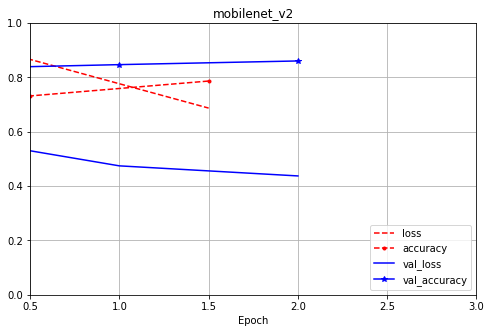

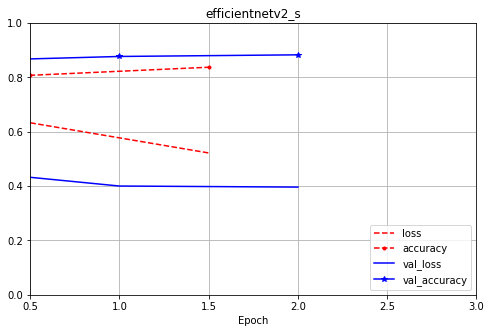

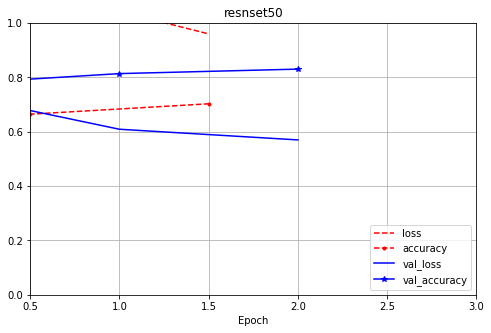

In [ ]:
for history in histories:
    plt.figure(figsize=(8, 5))
    for key, style in zip(histories[history].history, ["r--", "r--.", "b-", "b-*"]):
        epochs = np.array(histories[history].epoch) + (0 if key.startswith("val_") else -0.5)
        plt.plot(epochs, histories[history].history[key], style, label=key)
    #print(C)
    plt.title(f'{history}')
    plt.xlabel("Epoch")
    plt.axis([0.5,3, 0., 1])
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [ ]:
print(C)

In [ ]:
def plot_generator_images(gen, suptitle, labelDecDict = None, print_pred = False, model = None, nrows = 3, ncols = 3, figsize = (12, 12)):
    gen_data = gen.next()

    plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
    #plt.suptitle(suptitle, fontsize = 20)
    plt.tight_layout(rect = [0, 0, 1, 0.96], h_pad = 2)

    if(print_pred and model):
        pred = model.predict(gen_data[0]).argmax(1)

    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.axis(False)
        plt.grid(False)

        if(print_pred and pred.any()):
            #plt.suptitle(suptitle, fontsize = 20)
            plt.title(f"\nTrue: {[gen_data[1][i]]}\nPredicted: {pred[i]}")
        else:
            plt.title(gen_data[1][i])
        plt.imshow(gen_data[0][i])

1/1 [==============================] - 5s 5s/step


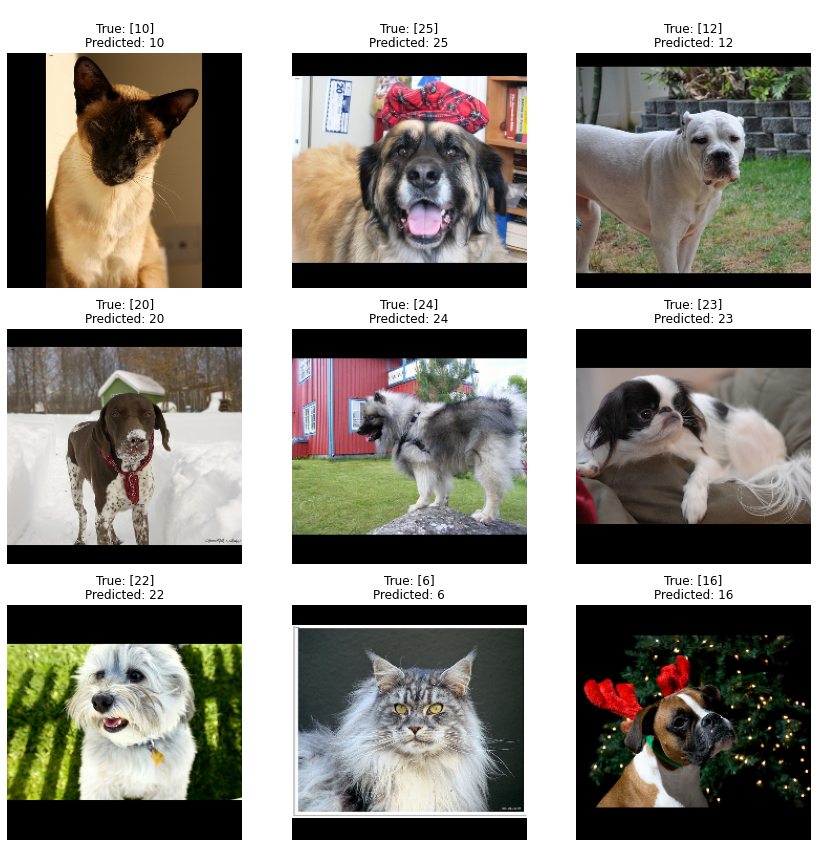

In [ ]:
# Predict on the last model
plot_generator_images(test_data, "Test data vs Predicts",
                      print_pred = True,model = model)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, LeakyReLU, BatchNormalization, Activation

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

base_model.trainable=False
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = data_augmentation(x)
#x = Rescaling(1/255)(x)

x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = keras.layers.Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
#x = keras.layers.Dropout(0.2)(x)


x = keras.layers.Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = keras.layers.Dropout(0.3)(x)

outputs = keras.layers.Dense(37, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 sequential_3 (Sequential)   (None, 7, 7, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_9 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5, mode = 'auto')


callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="base_Xception.keras",
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(train_data,epochs=100,validation_data= val_data,callbacks= [callbacks,es])

In [ ]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 6, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [ ]:
# Evaluate the model
loss, acc = model.evaluate(test_data, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
plot_generator_images(test_data, "Test data vs Predicts",
                      print_pred = True,model = model)

In [ ]:
base_model.trainable = True
model.summary()

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-5),  # Low learning rate
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

epochs = 10
history = model.fit(train_data, epochs=epochs, validation_data=val_data)

In [ ]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 6, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [ ]:
# Re-evaluate the model
loss, acc = model.evaluate(test_data, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
plot_generator_images(test_data, "Test data vs Predicts",
                      print_pred = True,model = model)

In [ ]:
preds = model.predict(test_data)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds.argmax(1)))